In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
batch_size = 4
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

data = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

train_indices = list(range(len(data)))[:40000]
validation_indices = list(range(len(data)))[40000:]

# train_sample = torch.utils.data.SubsetRandomSampler(train_indices)
# validation_sample = torch.utils.data.SubsetRandomSampler(validation_indices)


# Subsets of the whole train data using the sampled indices
trainset = torch.utils.data.Subset(data, train_indices)
validationset = torch.utils.data.Subset(data, train_indices)

# Dataloader using the created subsets
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

validationloader = torch.utils.data.DataLoader(validationset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)


testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
print('Train set size: ', len(trainloader) * 4)
print('Validation set size: ', len(validationloader) * 4)
print('Test set size: ', len(testloader) * 4)

Train set size:  40000
Validation set size:  40000
Test set size:  10000


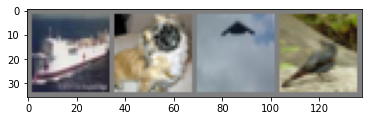

 ship   dog plane  bird


In [4]:
# The function to show an image.
def imshow(img):
    img = img / 2 + 0.5     # Unnormalize.
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images.
dataiter = iter(trainloader)
images, labels = next(dataiter)
# Show images.
imshow(torchvision.utils.make_grid(images))
# Print labels.
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

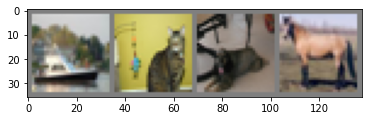

 ship   cat   dog horse


In [5]:
# Get some random valldation images.
dataiter = iter(validationloader)
images, labels = next(dataiter)
# Show images.
imshow(torchvision.utils.make_grid(images))
# Print labels.
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [6]:
# If there are GPUs, choose the first one for computing. Otherwise use CPU.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)  
# If 'cuda:0' is printed, it means GPU is available.

cuda:0


In [7]:
class NetMod(nn.Module):
    def __init__(self):
        super(NetMod, self).__init__()
        self.pool = nn.MaxPool2d(kernel_size=(2,2))
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=96, kernel_size=3, stride=1, padding=1)
        self.batchnorm1 = nn.BatchNorm2d(96)
        self.conv2 = nn.Conv2d(in_channels=96, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.batchnorm2 = nn.BatchNorm2d(256)
        self.conv3 = nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, stride=1, padding=1)
        self.batchnorm3 = nn.BatchNorm2d(384)
        self.conv4 = nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, stride=1, padding=1)
        self.batchnorm4 = nn.BatchNorm2d(384)
        self.conv5 = nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.batchnorm5 = nn.BatchNorm2d(256)
        self.fc1 = nn.Linear(in_features=256, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=256)
        self.fc3 = nn.Linear(in_features=256, out_features=10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.batchnorm1(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.batchnorm2(x)
        x = self.pool(F.relu(self.conv3(x)))
        x = self.batchnorm3(x)
        x = self.pool(F.relu(self.conv4(x)))
        x = self.batchnorm4(x)
        x = self.pool(F.relu(self.conv5(x)))
        x = self.batchnorm5(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = self.fc2(F.relu(x))
        x = self.fc3(F.relu(x))
        x = F.relu(x)
        return x

net = NetMod()     # Create the network instance.
net.to(device)  # Move the network parameters to the specified device.

NetMod(
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv1): Conv2d(3, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(96, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm3): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm4): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_fea

In [8]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use stochastic gradient descent (SGD) as optimizer.
opt = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(opt, mode='min', patience=2, threshold=0.01, verbose=True)

In [9]:
avg_losses = []   # Avg. losses.
validation_losses = []
epochs = 90       # Total epochs.
print_freq = 2000  # Print frequency.
lr_list = set()

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    validation_loss = 0.0
    
    net.train()
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq    
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

    net.eval()
    with torch.no_grad():
        for i, data in enumerate(validationloader, 0):
            # Get the inputs.
            inputs, labels = data

            # Move the inputs to the specified device.
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward step.
            outputs = net(inputs)
            loss = loss_func(outputs, labels)
            validation_loss += loss.item()
            validation_losses.append(validation_loss)
    net.train()
    
    # If validation error no longer improve, divide the lr by 10
    scheduler.step(validation_loss)
    print('Validation Loss: ', validation_loss)
    lr_list.add(scheduler._last_lr[0])
                            

print('Finished Training.')
print('LR list: ', lr_list)

[epoch: 0, i:  1999] avg mini-batch loss: 1.9660970367789268
[epoch: 0, i:  3999] avg mini-batch loss: 1.6764356264472007
[epoch: 0, i:  5999] avg mini-batch loss: 1.5704693296775223
[epoch: 0, i:  7999] avg mini-batch loss: 1.4708876583725214
[epoch: 0, i:  9999] avg mini-batch loss: 1.4023574659600855
Validation Loss:  12079.447311527096
[epoch: 1, i:  1999] avg mini-batch loss: 1.3103752467259764
[epoch: 1, i:  3999] avg mini-batch loss: 1.262191031485796
[epoch: 1, i:  5999] avg mini-batch loss: 1.1448140057362617
[epoch: 1, i:  7999] avg mini-batch loss: 1.1156115364152939
[epoch: 1, i:  9999] avg mini-batch loss: 1.0772900836560875
Validation Loss:  7634.300760407932
[epoch: 2, i:  1999] avg mini-batch loss: 0.9441437990162521
[epoch: 2, i:  3999] avg mini-batch loss: 0.9866852486412973
[epoch: 2, i:  5999] avg mini-batch loss: 0.9539242966156453
[epoch: 2, i:  7999] avg mini-batch loss: 0.9289130010399967
[epoch: 2, i:  9999] avg mini-batch loss: 0.9327559400256723
Validation Lo

[epoch: 23, i:  9999] avg mini-batch loss: 0.36062634901949786
Validation Loss:  1323.3487428830872
[epoch: 24, i:  1999] avg mini-batch loss: 0.2737926420082804
[epoch: 24, i:  3999] avg mini-batch loss: 0.289912806943903
[epoch: 24, i:  5999] avg mini-batch loss: 0.3001091164251848
[epoch: 24, i:  7999] avg mini-batch loss: 0.343381355014164
[epoch: 24, i:  9999] avg mini-batch loss: 0.36069192444894
Epoch 00025: reducing learning rate of group 0 to 1.0000e-04.
Validation Loss:  1305.9633780838449
[epoch: 25, i:  1999] avg mini-batch loss: 0.21145140542837906
[epoch: 25, i:  3999] avg mini-batch loss: 0.17797035964918906
[epoch: 25, i:  5999] avg mini-batch loss: 0.16981784146915016
[epoch: 25, i:  7999] avg mini-batch loss: 0.15721473768162833
[epoch: 25, i:  9999] avg mini-batch loss: 0.14992130740413268
Validation Loss:  404.8734176948292
[epoch: 26, i:  1999] avg mini-batch loss: 0.12028973770533775
[epoch: 26, i:  3999] avg mini-batch loss: 0.11554026222957327
[epoch: 26, i:  59

Epoch 00047: reducing learning rate of group 0 to 1.0000e-05.
Validation Loss:  10.721072170364039
[epoch: 47, i:  1999] avg mini-batch loss: 0.025852756201576087
[epoch: 47, i:  3999] avg mini-batch loss: 0.025164127602092776
[epoch: 47, i:  5999] avg mini-batch loss: 0.026092667250542944
[epoch: 47, i:  7999] avg mini-batch loss: 0.029176365802984945
[epoch: 47, i:  9999] avg mini-batch loss: 0.02075441095084261
Validation Loss:  8.729877609331139
[epoch: 48, i:  1999] avg mini-batch loss: 0.02334178866043112
[epoch: 48, i:  3999] avg mini-batch loss: 0.022333666803156575
[epoch: 48, i:  5999] avg mini-batch loss: 0.023034003761208625
[epoch: 48, i:  7999] avg mini-batch loss: 0.024113609253265167
[epoch: 48, i:  9999] avg mini-batch loss: 0.02343818950192872
Validation Loss:  9.421133558422696
[epoch: 49, i:  1999] avg mini-batch loss: 0.02265033472709729
[epoch: 49, i:  3999] avg mini-batch loss: 0.023954510007752106
[epoch: 49, i:  5999] avg mini-batch loss: 0.02077114337643161
[e

[epoch: 69, i:  5999] avg mini-batch loss: 0.022843285540262513
[epoch: 69, i:  7999] avg mini-batch loss: 0.021718806700774623
[epoch: 69, i:  9999] avg mini-batch loss: 0.02128233479251503
Validation Loss:  8.393219173869426
[epoch: 70, i:  1999] avg mini-batch loss: 0.0224934684320242
[epoch: 70, i:  3999] avg mini-batch loss: 0.022927331508709813
[epoch: 70, i:  5999] avg mini-batch loss: 0.019164873699065537
[epoch: 70, i:  7999] avg mini-batch loss: 0.02129000789922884
[epoch: 70, i:  9999] avg mini-batch loss: 0.01999929201975192
Validation Loss:  7.104022088350945
[epoch: 71, i:  1999] avg mini-batch loss: 0.022045559963751658
[epoch: 71, i:  3999] avg mini-batch loss: 0.021286168153657855
[epoch: 71, i:  5999] avg mini-batch loss: 0.0212028370614089
[epoch: 71, i:  7999] avg mini-batch loss: 0.02126690621790749
[epoch: 71, i:  9999] avg mini-batch loss: 0.02010201666179546
Validation Loss:  10.503554879750311
[epoch: 72, i:  1999] avg mini-batch loss: 0.020176358016680752
[epo

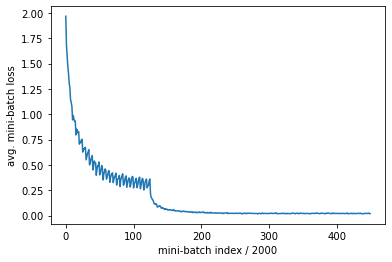

In [10]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

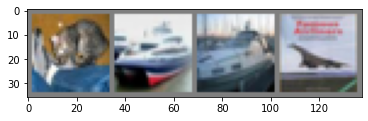

GroundTruth:    cat  ship  ship plane
Predicted:    cat   car  ship plane


In [11]:
# Check several images.
dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))
outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(batch_size)))

In [12]:
# Get test accuracy.
correct = 0
total = 0

net.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

net.train()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 82 %


In [13]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(batch_size):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 82 %
Accuracy of   car : 89 %
Accuracy of  bird : 72 %
Accuracy of   cat : 61 %
Accuracy of  deer : 77 %
Accuracy of   dog : 70 %
Accuracy of  frog : 83 %
Accuracy of horse : 82 %
Accuracy of  ship : 88 %
Accuracy of truck : 88 %
